# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Importing the dataset

In [2]:
mathdf = pd.read_csv('student-mat.csv',sep=';') # just focusing on math
select_mathdf = mathdf[['age','Medu','Fedu','famrel','freetime','goout','Dalc','Walc','health','absences',
                       'G1','G2','G3']] # just focusing on numerical values

# Exploring Data Analysis (EDA)

In [33]:
select_mathdf.head()

,age,Medu,Fedu,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,4,3,4,1,1,3,6,5,6,6
1,17,1,1,5,3,3,1,1,3,4,5,5,6
2,15,1,1,4,3,2,2,3,3,10,7,8,10
3,15,4,2,3,2,2,1,1,5,2,15,14,15
4,16,3,3,4,3,2,1,2,5,4,6,10,10


In [34]:
print('Structure:')
print(select_mathdf.info())
print('\nSummary Statistics:')
print(select_mathdf.describe())
print('\nTypes:')
print(select_mathdf.dtypes)
print('\nColumns:')
print(select_mathdf.columns)

Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       395 non-null    int64
 1   Medu      395 non-null    int64
 2   Fedu      395 non-null    int64
 3   famrel    395 non-null    int64
 4   freetime  395 non-null    int64
 5   goout     395 non-null    int64
 6   Dalc      395 non-null    int64
 7   Walc      395 non-null    int64
 8   health    395 non-null    int64
 9   absences  395 non-null    int64
 10  G1        395 non-null    int64
 11  G2        395 non-null    int64
 12  G3        395 non-null    int64
dtypes: int64(13)
memory usage: 40.2 KB
None

Summary Statistics:
              age        Medu        Fedu      famrel    freetime       goout  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    3.944304    3.235443    3.108861   
std      1.276043   

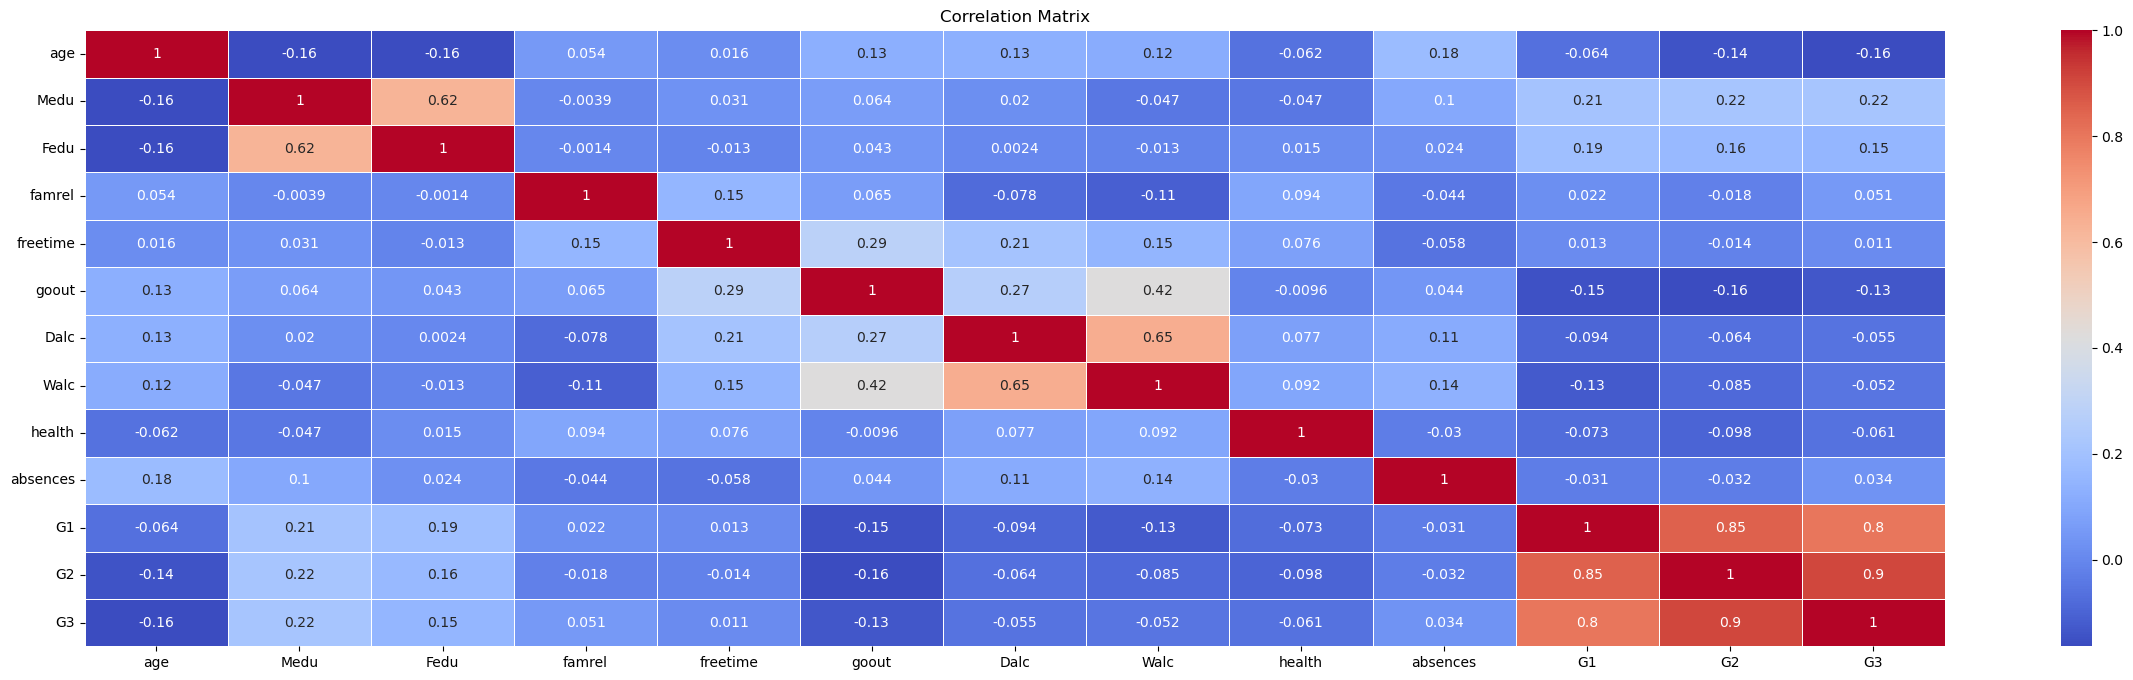

In [3]:
corr = select_mathdf.iloc[:, :].corr()
plt.figure(figsize=(30, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

With this information, I believe that I have a good understanding of this data; the strongest correlations exist between the education of the father and mother and between workday and weekend alcohol consumption. However, I'm most interested on these factors' influence on final grade (G3) - so I'll be looking at some combination of Medu and Fedu vs G3.

# Hypothesis Formulation

## 1. The relationship between father's education (Fedu) and final grade (G3) is statistically signifigant

In [4]:
pearson_corr1, p_value1 = stats.pearsonr(select_mathdf['Fedu'], select_mathdf['G3'])
print('Pearson Correlation Coefficient: ', pearson_corr1,
     '\nP-Value: ',p_value1)

Pearson Correlation Coefficient:  0.15245693890425835 
P-Value:  0.0023799726323399453


In [5]:
# To test signifigance, using α = 0.05

alpha = 0.05

if p_value1 < alpha:
    print('Statistically Signifigant')
else:
    print('Not Statistically Signifigant')

Statistically Signifigant


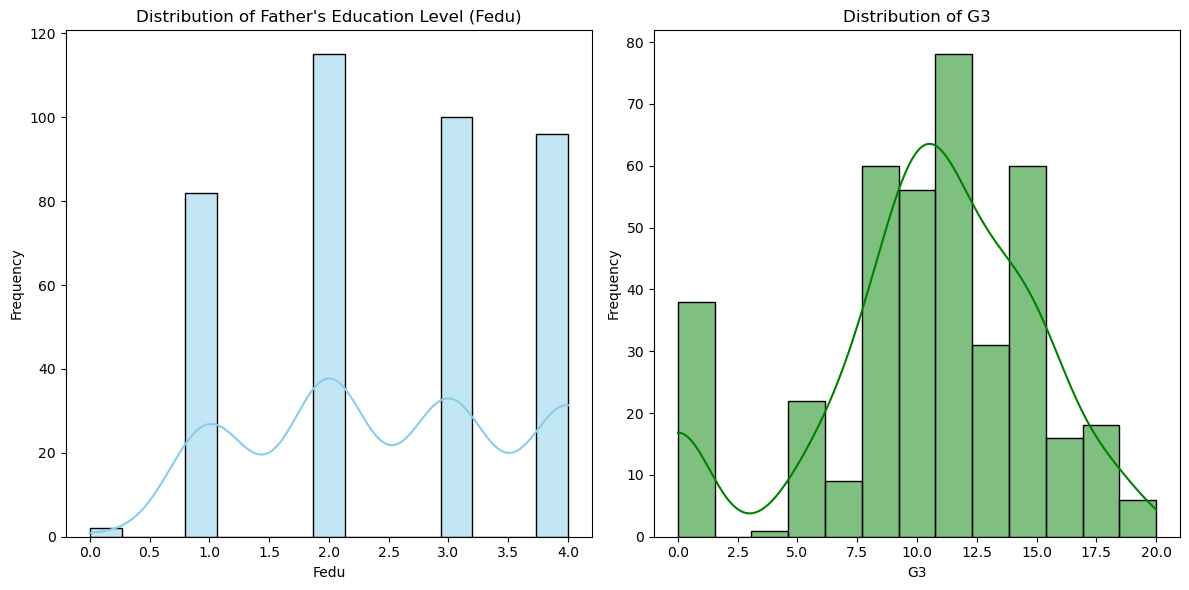

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(select_mathdf['Fedu'], kde=True, color='skyblue')
plt.title("Distribution of Father's Education Level (Fedu)")
plt.xlabel("Fedu")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(select_mathdf['G3'], kde=True, color='green')
plt.title("Distribution of G3")
plt.xlabel("G3")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Using code, I was able to test my hypothesis which confirmed my hypothesis as true - that the relationship is statistically signifigant. Looking at two distribution charts the relationship is less obvious although still visible.

## 2. The relationship between mother's education (Medu) and final grade (G3) is statistically signifigant

In [7]:
pearson_corr2, p_value2 = stats.pearsonr(select_mathdf['Medu'], select_mathdf['G3'])
print('Pearson Correlation Coefficient: ', pearson_corr2,
     '\nP-Value: ',p_value2)

Pearson Correlation Coefficient:  0.21714749613860565 
P-Value:  1.336107323691043e-05


In [8]:
# Same signifigance, using α = 0.05

if p_value2 < alpha:
    print('Statistically Signifigant')
else:
    print('Not Statistically Signifigant')

Statistically Signifigant


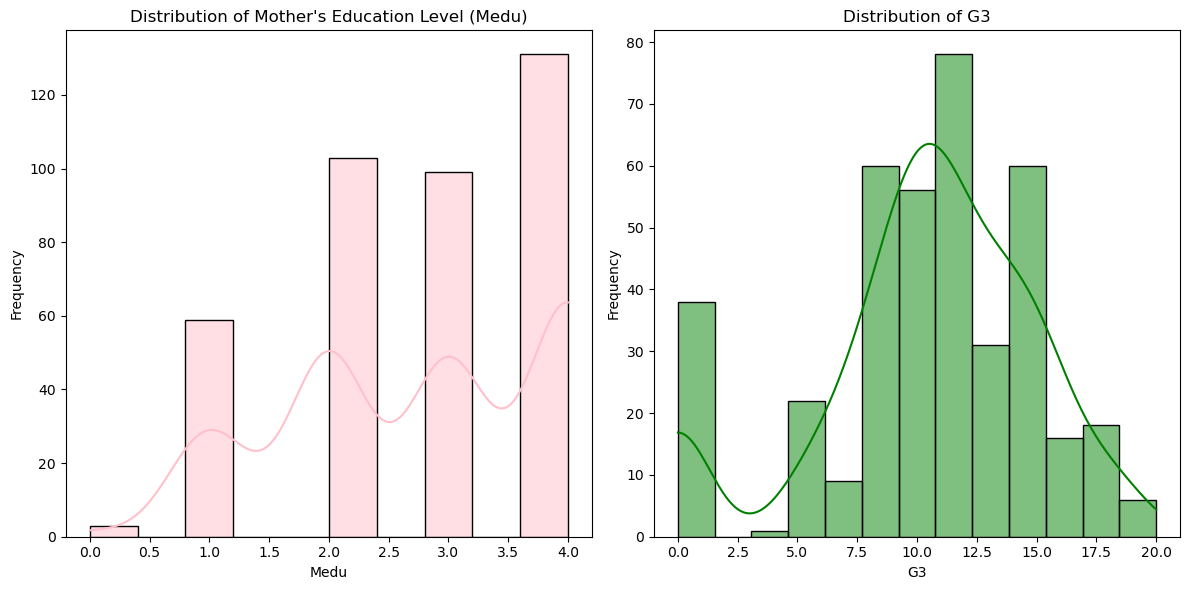

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(select_mathdf['Medu'], kde=True, color='pink')
plt.title("Distribution of Mother's Education Level (Medu)")
plt.xlabel("Medu")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(select_mathdf['G3'], kde=True, color='green')
plt.title("Distribution of G3")
plt.xlabel("G3")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Using code, I was able to test my hypothesis which confirmed my hypothesis as true - that the relationship is statistically signifigant. It's more difficult to tell if the visualization helps determine the hypothesis.